2023-05-29
# 데이터 분석 3단계
## 설계
+ 과제 정의 및 범위 설정
+ 인력 구성 및 PM확보
+ 실무자&데이터 분석가 간 협의 체계 수립
## 분석 및 모델링
+ 데이터 분석을 위한 데이터 MART구축
+ 데이터 준비, 가공, 분석 및 모델 도출
+ 모델 검증 및 실무, 경영진 협의
## 구축 및 활용
+ 모델 적용 및 시스템 구축
+ 성과 평가 및 추가, 보완 프로젝트 검토

---------------------------------------------
# 1. 비즈니스 문제 정의와 분석 목적 도출 과정 제시
### 비즈니스 문제는 현상에 대한 설명으로 끝나서는 안되고, 본질적인 문제점이 함께 전달되어야 함.
1. 중고차는 자동차 브랜드의 영업권, 자동차의 기능, 마력 및 연비 등과 같은 많은 요소에 따라 시세가 달라져 새로운 구매자의 시장 참여가 저조해 시장 성장이 제한되어 있음.
    + 분석 : 중고차 시세를 예측하는 모델을 만들어 새로운 구매자의 시장 참여를 높임.

---------------------------------------------
# 2. 데이터에 대한 도메인 지식 설명
### 분석 프로젝트를 수행하는 동안에는 실무자들 간의 커뮤니케이션 및 협력이 매우 중요.
+ 실제로는 실무자 인터뷰를 통해 도메인 지식 이해와 정보 수집을 하지만, 인터뷰가 불가능하므로 검색을 통해 전문 기관의 견해를 찾아본다.
1. https://www.taei.re.kr/bbs/board.php?bo_table=5&wr_id=124, 교통사고공학연구소, "중고차 시세에 영향을 미치는 주요 요인"
    + 기계/차량 기술사들로 구성된 연구기관으로 법원 등 공공기관에서 차량에 대해서 전문적으로 감정하는 연구소이다.
    + 위의 내용에 따르면 중고차의 가격평가에 가장 기본적이고 핵심적인 요소는 "연식, 주행거리, 사고유무, 차량상태"이다.
2. http://www.encar.com/sg/sg_sellguide.do?method=view&bbs_no=29, 엔카, "시세에 영향을 주는 것은 무엇이 있나요?"
    + 한 때 SK브랜드 명을 사용했던 국내 중고차 쇼핑몰 사이트이다.
    + 위의 가이드 내용에 따르면 가격에 영향을 미치는 중요한 요인으로 "사고유무, 연식, 주행거리, 색상, 옵션, 튜닝, 사용 용도, 차량 수리 상태"를 꼽고있다.
3. https://post.naver.com/viewer/postView.nhn?volumeNo=29533454&memberNo=31381824, 중고차 매입 브랜드 굿바이셀카, "중고차가격 결정하는 요소는 무엇일까?"
    + 중고차 판매업 회사이다. 이와 같은 사설 중고차 판매업 회사들 대부분 비슷한 견해를 보인다.
    + 위의 내용에 따르면 크게 중고차가격을 측정하는 방법으로는 "색상, 주행거리, 옵션, 사고유무, 등급" 등이 있다.
    + 이 중 가격에 크게 영향을 미치는 객관적으로 가장 빠르고 확실하게 확인할 수 있는 부분은 "사고 유무, 주행거리"이다.

### 요약하자면, 중고차 가격에 영향을 미치는 가장 요소로는 "연식, 주행거리, 사고유무"정도를 꼽을 수 있겠다.
+ (가설 설정) 중고차 가격 예측은 연식, 주행거리, 사고유무만 알아도 어느정도 예측이 가능할 것이다.

---------------------------------------------
# 3. 데이터의 통계적 측정과 분석
1. 데이터 수집 : 데이터 셋 주어짐
2. 데이터 탐색 : 패턴, 결측치, 이상치 등 파악. 기초 통계량 계산, 시각화 등을 통해 수행.
3. 기술통계량 계산 : 데이터의 중심 경향성, 변동성 설명하기위해 기술 통계량 계산. 평균, 중앙값, 분산, 표준편차가 해당.
# 4. 데이터 시각화
1. 데이터 시각화 : 데이터를 시각적으로 표현하여 패턴을 파악하고 인사이트 도출.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

In [4]:
# 데이터 불러오기
df = pd.read_csv("./car data.csv")

# 데이터 샘플 확인
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# 각 칼럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 관찰 결과
+ 8개의 변수 모두 결측값이 없고 데이터 타입을 확인할 수 있다.

In [6]:
# 각 칼럼의 통계치 확인
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# 각 칼럼의 왜도 확인(얼마나 한 쪽으로 치우쳤는지 )
df.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_137260\1444879840.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Year            -1.246189
Selling_Price    2.493422
Present_Price    4.085409
Driven_kms       6.436013
Owner            7.616850
dtype: float64

In [8]:
# 각 칼럼의 첨도 확인(얼마나 중앙에 쏠려 있는지)
df.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_137260\4257931793.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Year              1.533319
Selling_Price     8.902970
Present_Price    31.725586
Driven_kms       68.563569
Owner            73.325141
dtype: float64

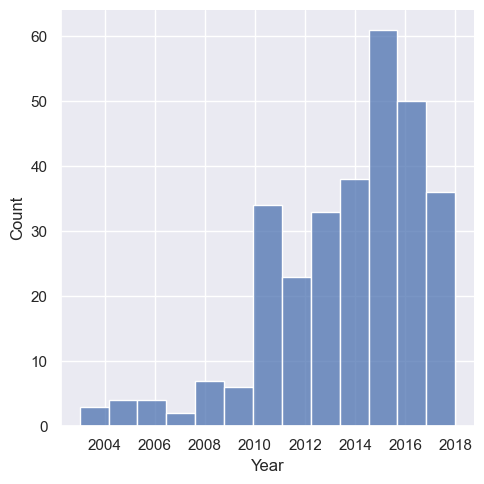

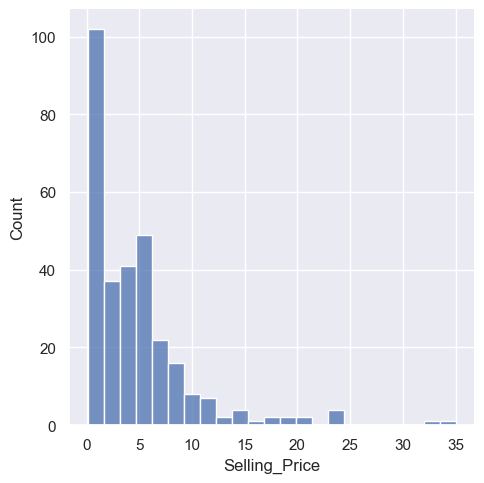

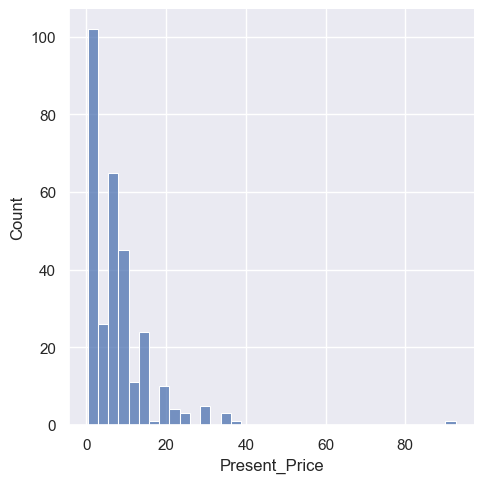

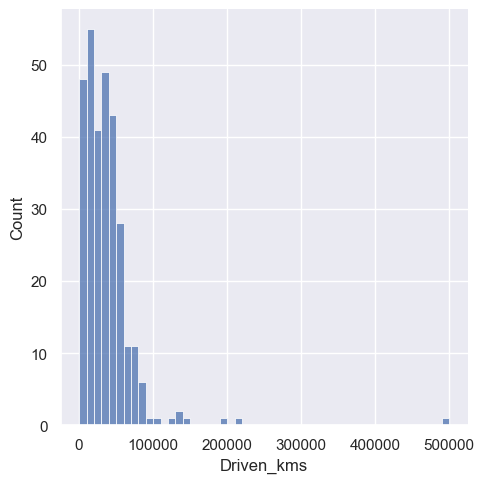

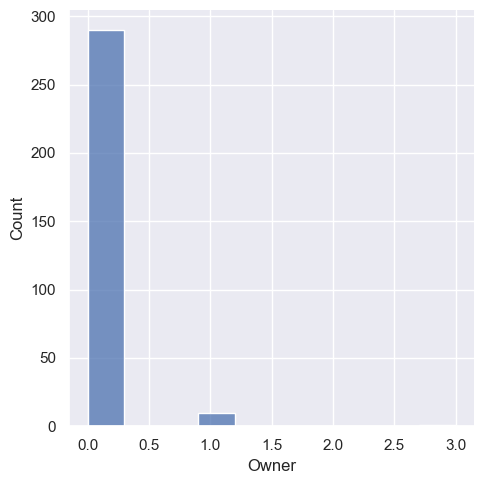

In [10]:
# 특정 변수 분포 시각화(왜도와 첨도 시각화해서 확인 가능)
sns.displot(df["Year"])
sns.displot(df["Selling_Price"])
sns.displot(df["Present_Price"])
sns.displot(df["Driven_kms"])
sns.displot(df["Owner"])

### 평균, 분산, 왜도, 첨도, 결측치 등 각 변수 툭성을 파악한 다음 변수간의 관계를 파악함.
+ 공분산과 상관계수

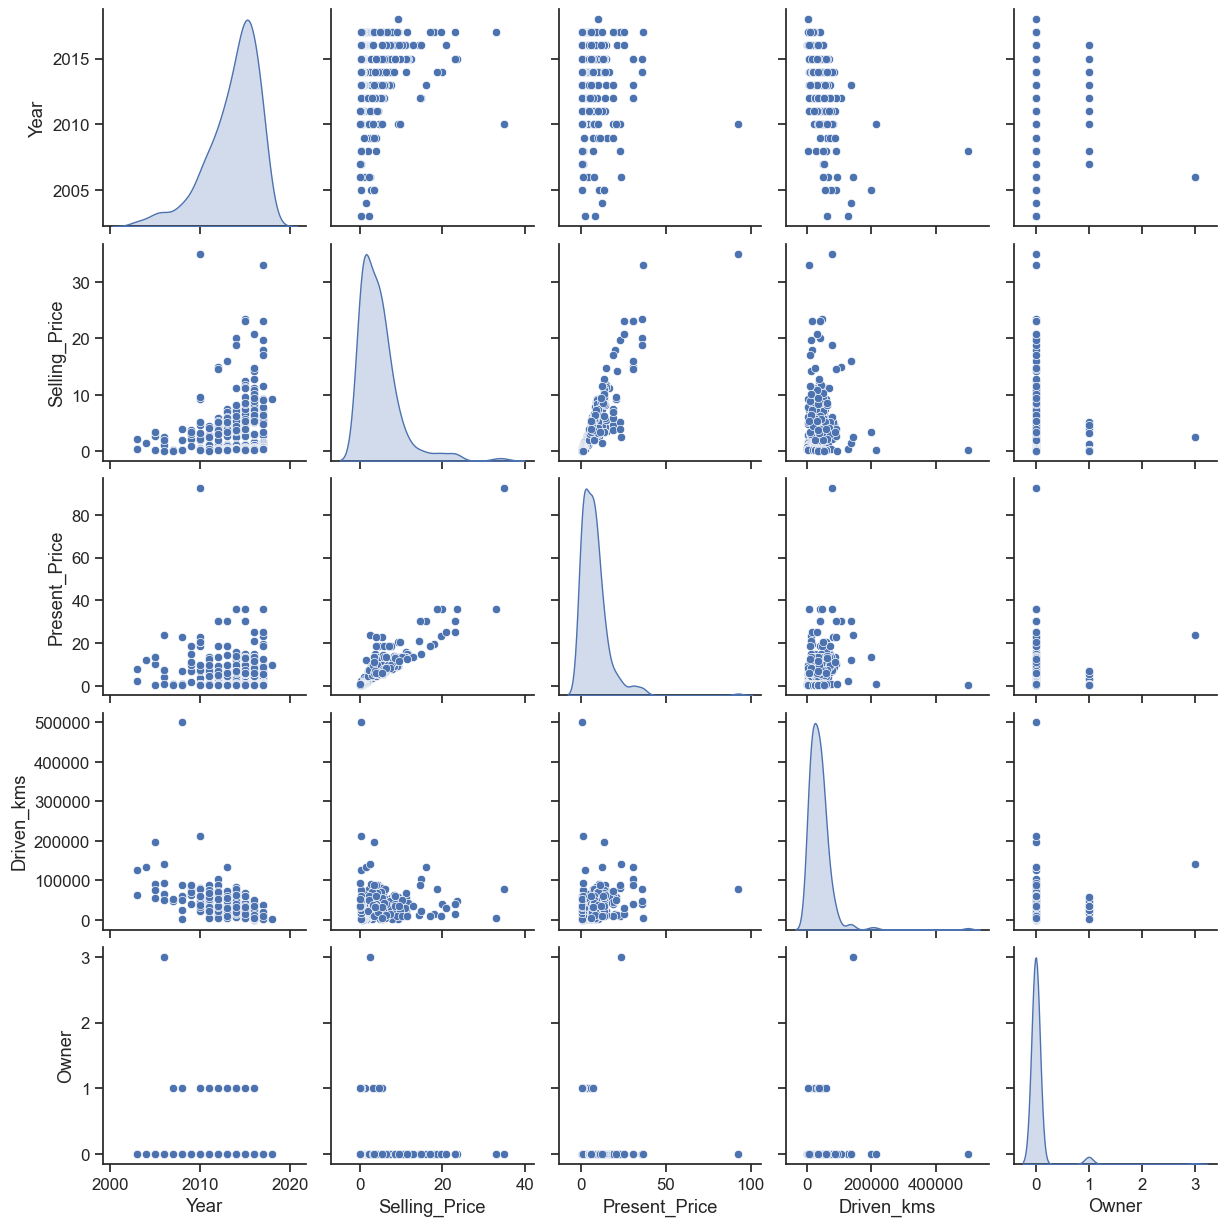

In [11]:
# 산점도 행렬 시각화
sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.pairplot(df, diag_kind="kde")
plt.show()

In [12]:
# 공분산 확인(변수끼리 얼마나 상관 관계가 있나)
df.cov()

C:\Users\user\AppData\Local\Temp\ipykernel_137260\1337637138.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,8.361085,3.470617,-1.179364,-5.895887e+04,-0.130543
Selling_Price,3.470617,25.834973,38.609504,5.768966e+03,-0.111323
Present_Price,-1.179364,38.609504,74.694264,6.843250e+04,0.017266
Driven_kms,-58958.869767,5768.965732,68432.499616,1.512190e+09,860.101074
Owner,-0.130543,-0.111323,0.017266,8.601011e+02,0.061462


In [13]:
# 피어슨 상관계수 확인(공분산을 정규화)
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_137260\1003652425.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.triu(np.ones_like(df.corr()))
C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; 

Text(0.5, 1.0, 'Car Data')

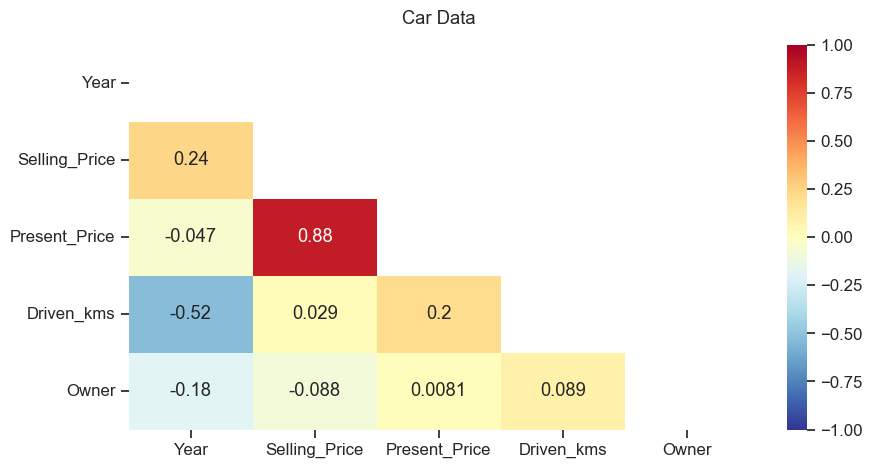

In [14]:
# 상관계수 시각화

# 중복 제거 히트맵 시각화

# 매트릭스 우측 상단을 모두 1(True), 하단을 0(False)
np.triu(np.ones_like(df.corr()))

# T/F mask 배열로 변환
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlBu_r", cbar=True)
ax.set_title("Car Data", pad = 15)

### 상관계수에 따른 해석표
|------|------|
|범위|단계|
|0|Zero|
|0.1~0.3|Weak|
|0.4~0.6|Moderate|
|0.7~0.9|Strong|
|1|Perfect|

### 관찰 결과
+ 신차 가격과 중고차 가격이 매우 강한 상관관계가 있음.
+ 각 차마다 신차 가격(Present_Price)이 다르기 때문에 단순히 Selling_Price와 다른 변수로 판단하기에는 무리가 있다. 따라서 (Present_Price - Selling_Price) / Present_Price의 백분위 변수를 추가해 "감가율"을 구하는 방법으로 수정해봐야 겠다.
    + 왜 신차 가격이 다르면 Selling_Price가 의미 없다고 생각하는가?
    + 이유 : 1억 짜리 자동차가 4000만원 감가되어 6000만원에 팔리는 것과 1000만원 짜리 자동차가 400만원 감가되어 600만원에 판매되는 것은, 같은 40%의 감가율을 가지지만 절대적인 감가액엔 3600만원이라는 상당한 금액차이를 보인다. 이런 경우 차량 전후 가격을 빼고 모든 조건이 동일한 경우가 있을 때 해당 케이스를 해석할 수 없는 상황이 벌어진다. 따라서 감가율을 도입해 차량의 가격을 신경쓰지 않고 상태와 성능적인 면을 위주로 해석해 가격을 책정한다.
+ 또한 날짜 데이터같은 경우에도 차량 연식을 좀더 직관적으로 표현해줄 수 있는 연식(Age)를 변수로 추가해야겠다.

In [63]:
# 데이터 불러오기
df = pd.read_csv("./car data.csv")

# 두 개의 변수 결합한 파생변수 생성

# 감가율 변수 생성
df["Depreciation_Ratio"] = (df["Present_Price"] - df["Selling_Price"]) / df["Present_Price"] * 100

# 자동차 연식 변수
df["Age"] = 2023 - df["Year"]
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Depreciation_Ratio,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,40.071556,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,50.209644,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,26.395939,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,31.325301,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,33.042213,9


In [65]:
# 각 칼럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Name            301 non-null    object 
 1   Year                301 non-null    int64  
 2   Selling_Price       301 non-null    float64
 3   Present_Price       301 non-null    float64
 4   Driven_kms          301 non-null    int64  
 5   Fuel_Type           301 non-null    object 
 6   Selling_type        301 non-null    object 
 7   Transmission        301 non-null    object 
 8   Owner               301 non-null    int64  
 9   Depreciation_Ratio  301 non-null    float64
 10  Age                 301 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 26.0+ KB


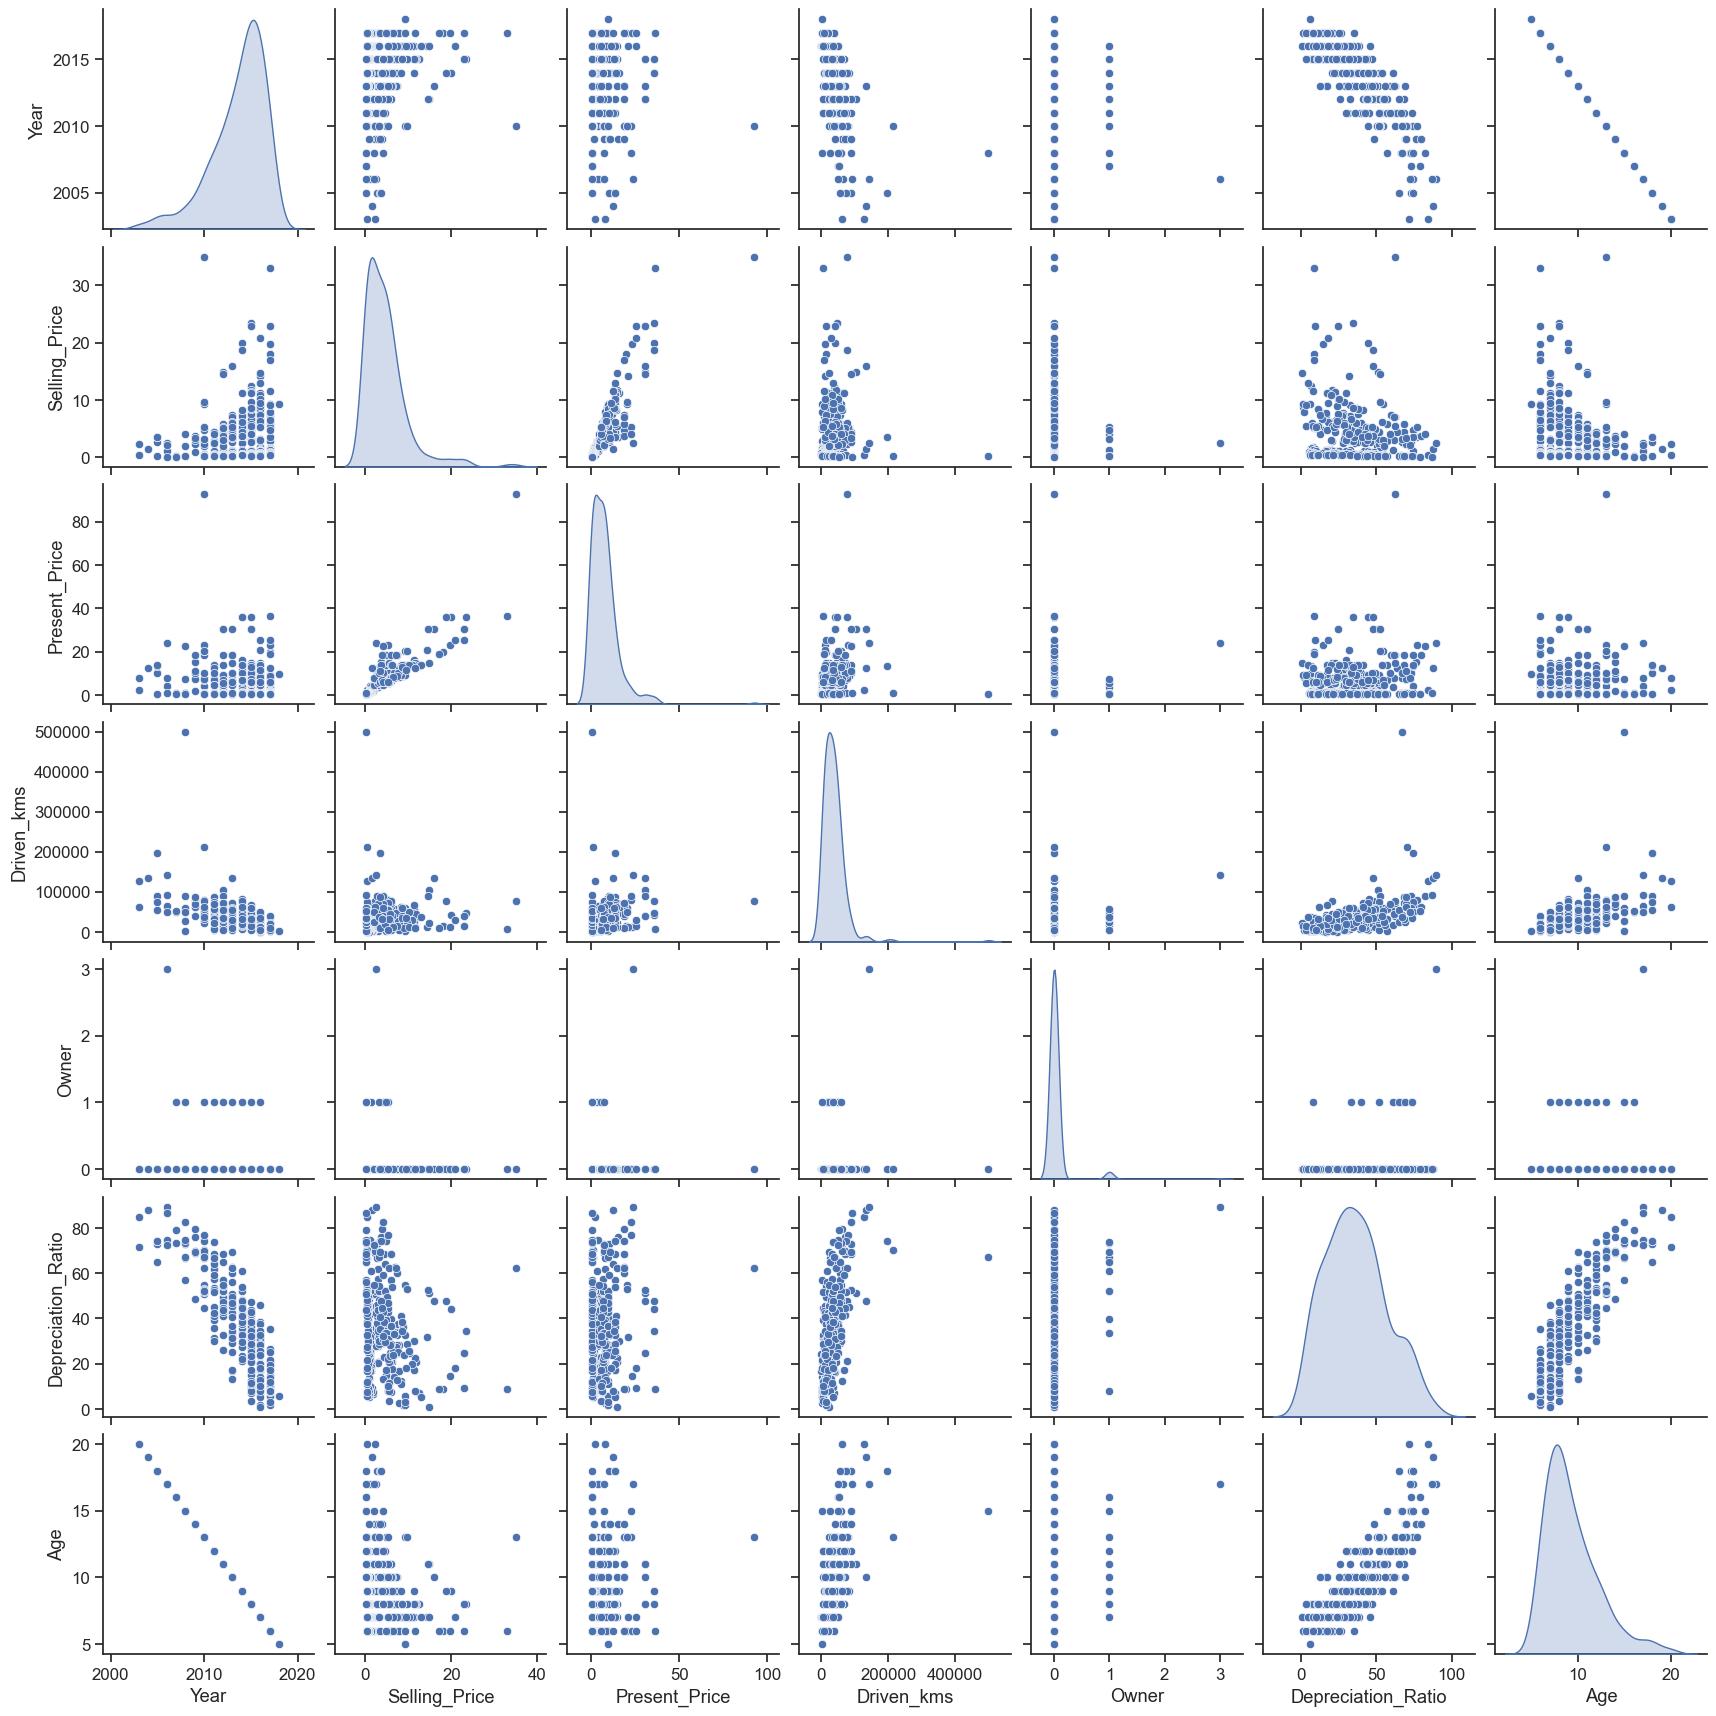

In [66]:
# 산점도 행렬 시각화
sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.pairplot(df, diag_kind="kde")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.triu(np.ones_like(df.corr()))
C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; 

Text(0.5, 1.0, 'Car Data')

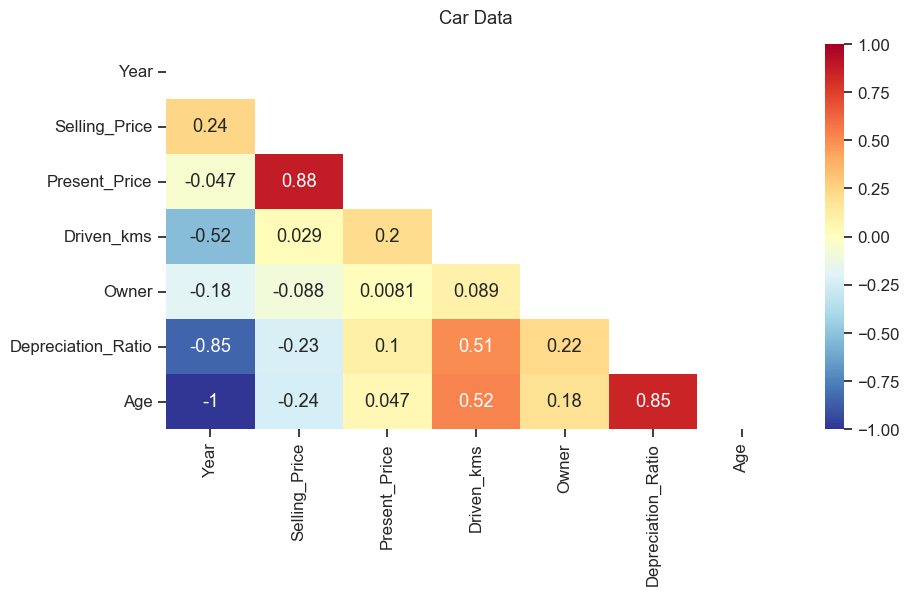

In [67]:
# 상관계수 시각화

# 중복 제거 히트맵 시각화

# 매트릭스 우측 상단을 모두 1(True), 하단을 0(False)
np.triu(np.ones_like(df.corr()))

# T/F mask 배열로 변환
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlBu_r", cbar=True)
ax.set_title("Car Data", pad = 15)

### 상관계수에 따른 해석표
|------|------|
|범위|단계|
|0|Zero|
|0.1~0.3|Weak|
|0.4~0.6|Moderate|
|0.7~0.9|Strong|
|1|Perfect|

### 관찰 결과
+ 차량의 연식과 감가율은 상관계수가 매우 높다. 차량의 연식이 오래됐을 수록 감가율도 높아진다(즉 중고차의 가격이 싸진다).
+ 주행 거리와 감가율은 상관계수가 보통이다. 주행 거리가 많을 수록 감가율도 높아진다.
+ 차량의 연식과 주행 거리는 상관계수가 보통이다. 연식이 오래됐으면 주행거리는 길어진다(상식적으로 당연).

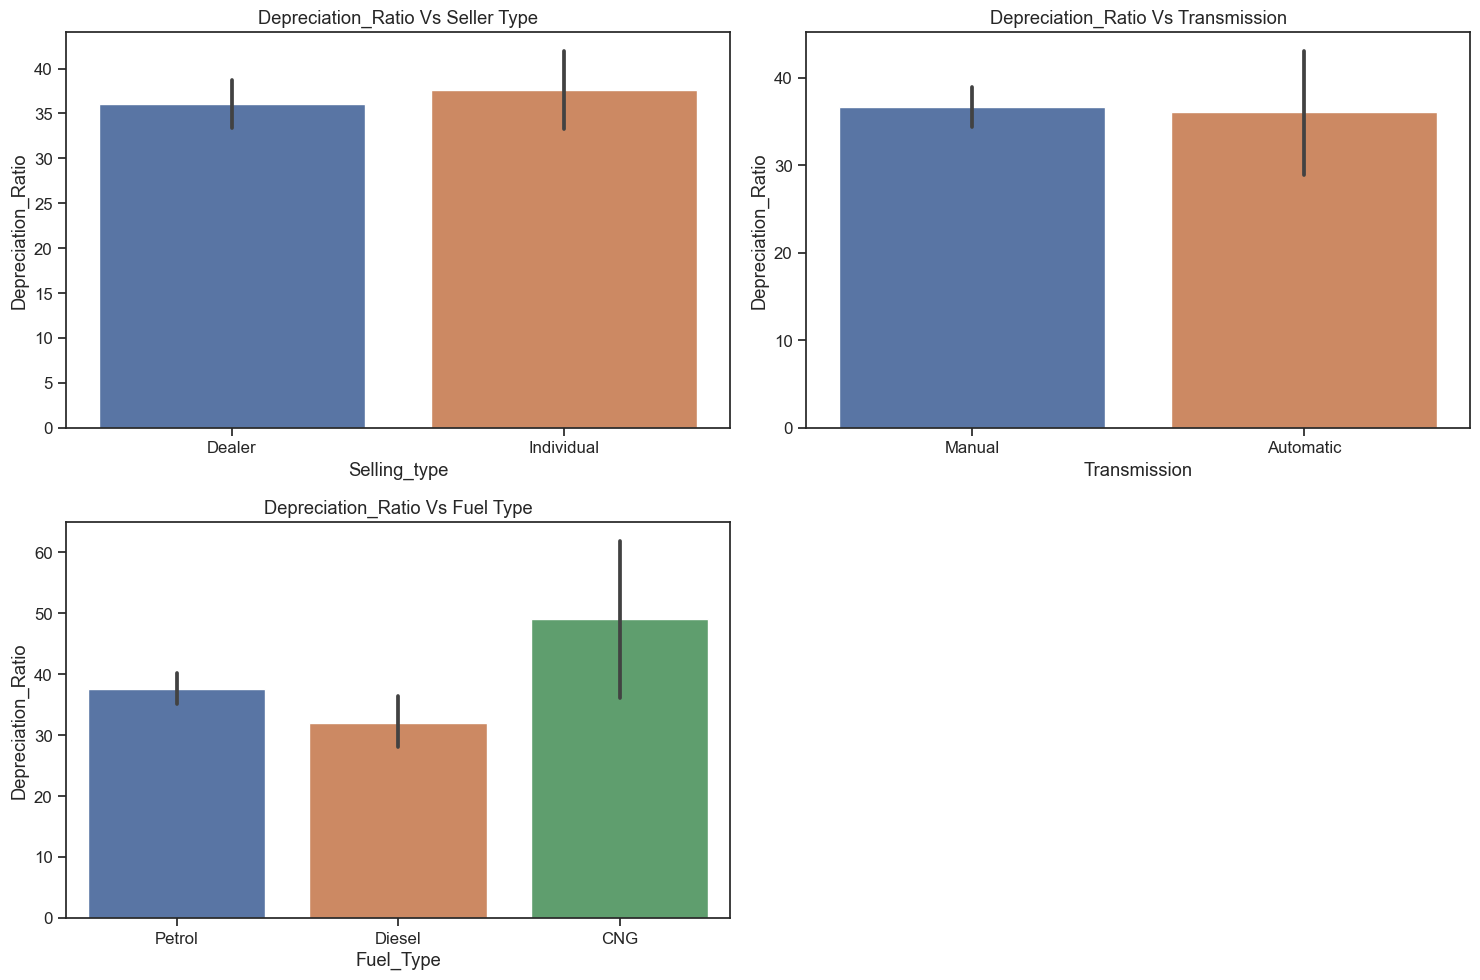

In [68]:
# 캐글 코드 참고했음

# 데이터 타입이 연산이 불가능한 데이터들 시각화 비교

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Selling_type', y='Depreciation_Ratio')
plt.title('Depreciation_Ratio Vs Seller Type')

plt.subplot(2, 2, 2)
sns.barplot(data=df,x='Transmission', y='Depreciation_Ratio')
plt.title('Depreciation_Ratio Vs Transmission')

plt.subplot(2, 2, 3)
sns.barplot(data=df,x='Fuel_Type', y='Depreciation_Ratio')
plt.title('Depreciation_Ratio Vs Fuel Type')
plt.tight_layout()
plt.show()

### 관찰 결과
+ 딜러를 통해 거래되나 개인을 통해 거래되나 감가율에는 별 차이가 없다.
+ 트랜스미션에 따른 감가율도 별 차이가 없다.
+ 연료 타입은 경유 차가 제일 감가율이 적었고 가솔린, 천연가스 순이다. 다만 천연가스의 경우 표본이 적은 것을 감안한다.
+ 따라서 위의 데이터 중, 적당한 수의 표본을 가지고, 유의미한 감가율 차이를 보이는 Fuel_Type만을 재가공해 최종 데이터에 추가한다.

In [69]:
# 코드 참고함

# 필요 없는 변수 제거
df_new = df.drop(labels=["Selling_type", "Transmission"], axis=1)

# Fuel_Type 변수를 더미데이를 채워넣어 새롭게 표현
# 디젤, 가솔린에 해당하는지 여부 0 과 1로 표현(False True)
# 둘 다 0인 데이터는 CNG
cat_col = ['Fuel_Type']

col = ["Fuel_Type"]
df_new = pd.concat([df_new]+[pd.get_dummies(df[i],drop_first=True,prefix=i+'_') for i in col],axis=1)
df_new.drop(["Fuel_Type"],axis=1,inplace=True)
df_new.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Depreciation_Ratio,Age,Fuel_Type__Diesel,Fuel_Type__Petrol
0,ritz,2014,3.35,5.59,27000,0,40.071556,9,0,1
1,sx4,2013,4.75,9.54,43000,0,50.209644,10,1,0
2,ciaz,2017,7.25,9.85,6900,0,26.395939,6,0,1
3,wagon r,2011,2.85,4.15,5200,0,31.325301,12,0,1
4,swift,2014,4.60,6.87,42450,0,33.042213,9,1,0


In [70]:
# 재가공된 car data 데이터 엑셀로 저장
df_new.to_csv('final car data.csv', index=False)

In [76]:
# 데이터 불러오기
df = pd.read_csv("./final car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Depreciation_Ratio,Age,Fuel_Type__Diesel,Fuel_Type__Petrol
0,ritz,2014,3.35,5.59,27000,0,40.071556,9,0,1
1,sx4,2013,4.75,9.54,43000,0,50.209644,10,1,0
2,ciaz,2017,7.25,9.85,6900,0,26.395939,6,0,1
3,wagon r,2011,2.85,4.15,5200,0,31.325301,12,0,1
4,swift,2014,4.60,6.87,42450,0,33.042213,9,1,0


C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.triu(np.ones_like(df.corr()))
C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
C:\Users\user\AppData\Local\Temp\ipykernel_137260\4062886022.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; 

Text(0.5, 1.0, 'Car Data')

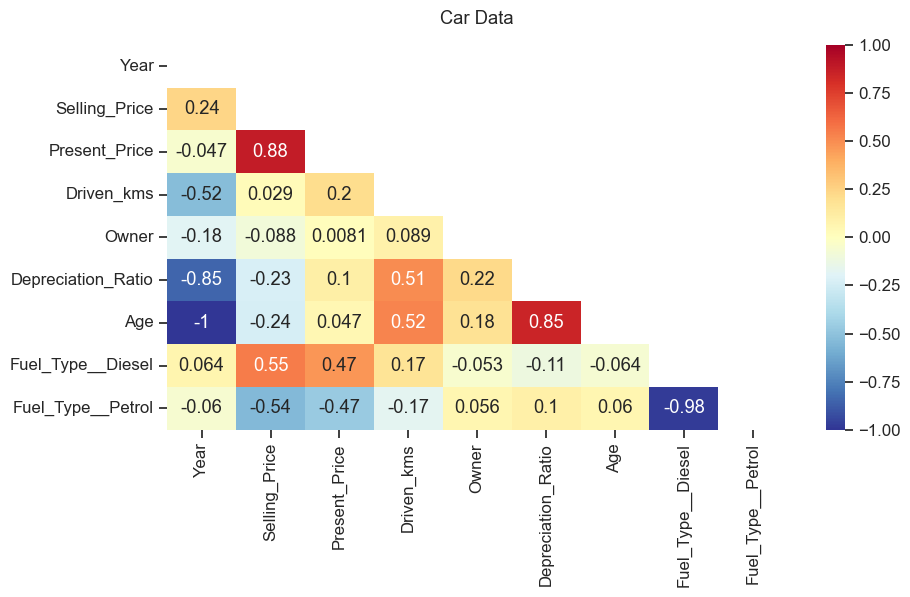

In [77]:
# 상관계수 시각화

# 중복 제거 히트맵 시각화

# 매트릭스 우측 상단을 모두 1(True), 하단을 0(False)
np.triu(np.ones_like(df.corr()))

# T/F mask 배열로 변환
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlBu_r", cbar=True)
ax.set_title("Car Data", pad = 15)

-------------------------------------
# 5. 예측 모델 구축

1. 주성분 분석(PCA)
    + 여러개의 독립변수들을 잘 설명해 줄 수 있는 주된 성분을 추출하는 기법.
    + 전체 변수들의 핵심 특성만 선별해 독립변수(차원)의 수를 줄임

In [71]:
import pandas as pd

df = pd.read_csv("./final car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Depreciation_Ratio,Age,Fuel_Type__Diesel,Fuel_Type__Petrol
0,ritz,2014,3.35,5.59,27000,0,40.071556,9,0,1
1,sx4,2013,4.75,9.54,43000,0,50.209644,10,1,0
2,ciaz,2017,7.25,9.85,6900,0,26.395939,6,0,1
3,wagon r,2011,2.85,4.15,5200,0,31.325301,12,0,1
4,swift,2014,4.60,6.87,42450,0,33.042213,9,1,0


In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

# 데이터 스케일 정규화
# 차원축소(종속변수 감가율 제거 및 계산에 필요없는 차 이름 제거, Age와 성질이 비슷한 Year 제거)
df1 = df.drop(labels=["Car_Name", "Depreciation_Ratio", "Year"], axis=1)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 칼럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type__Diesel,Fuel_Type__Petrol
0,0.093123,0.057109,0.053053,0.0,0.266667,0.0,1.0
1,0.133238,0.099913,0.085085,0.0,0.333333,1.0,0.0
2,0.204871,0.103273,0.012813,0.0,0.066667,0.0,1.0
3,0.078797,0.041504,0.009409,0.0,0.466667,0.0,1.0
4,0.128940,0.070980,0.083984,0.0,0.266667,1.0,0.0


### 주성분 분석을 하기에 앞서 정규화를 적용
+ 정규화를 하는 이유는 변수들 간의 스케일 차이가 클 경우 분산이 큰 변수가 주성분에 과도하게 영향을 주게 되기 때문.

In [80]:
# 주성분 개수 설정(최대 개수 설정)
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca,columns=["C1", "C2", "C3", "C4", "C5", "C6", "C7"])

# 주성분 설명력 확인
np.round_(pca.explained_variance_ratio_, 3)


array([0.817, 0.1  , 0.047, 0.016, 0.01 , 0.008, 0.002])

### 가장 높은 설명력을 가지는 두 개의 주성분까지 생성하여 테이블을 생성
+ 4개의 변수를 2개의 변수로 차원축소.

In [81]:
# 주성분 개수 설정(2개)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ["C1", "C2"])

df_pca.head()

,C1,C2
0,-0.289386,-0.036148
1,1.111945,0.098278
2,-0.264861,-0.257776
3,-0.298901,0.146091
4,1.110602,0.035922


<Axes: xlabel='C1', ylabel='C2'>

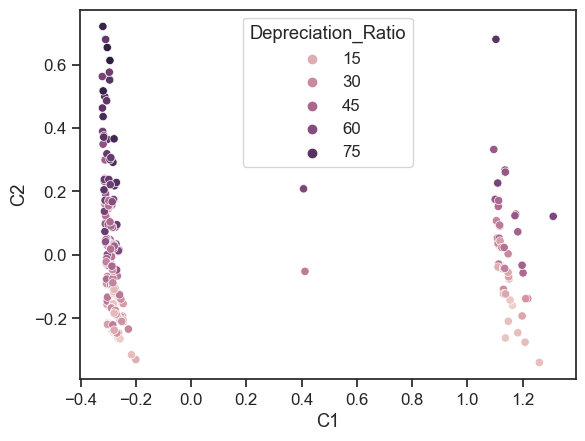

In [82]:
# 주성분에 따른 종속변수 시각화

# 주성분 테이블에 종속변수 칼럼 결합
df_concat = pd.concat([df_pca, df[["Depreciation_Ratio"]]], axis=1)

# 산점도 시각화
sns.scatterplot(data=df_concat, x="C1", y="C2", hue="Depreciation_Ratio")


### 관찰 결과
+ 종속변수 감가율은 C2의 변화에 비례함.
+ 또한 C1에 대해 감가율이 거의 이분화됌. 비교적 감가율이 클 수록 C1의 (-0.4) ~ (-0.2)구간에 포진해있고, 감가율이 작을 수록 1.1 ~ 1.3 구간에 분포해있음.

2. 선형 회귀분석
    + 독립변수의 평균을 통해 종속변수를 예측
    + 회귀분석은 독립변수 간에 상관관계가 없어야 하기 때문에 다중 회귀 분석을 할 때는 다중 공선성 검사를 해야 한다.
    + 기본 조건
        + 잔차의 정규성 : 독립변수에 해당되는 종속변수의 값들의 잔차는 정규분포.
        + 잔차의 등분산성 : 잔차의 분산은 회귀모형의 독립변수값과 상괍없이 일정해야 한다.
        + 선형성 : 독립변수 값의 변화에 따른 종속변수 값의 변화는 일정해야 한다.


In [83]:
import pandas as pd
import numpy as np
# 선형회귀모델 생성
from sklearn.linear_model import LinearRegression
# train/test set 생성
from sklearn.model_selection import train_test_split
# OLS모델
import statsmodels.api as sm
# MSE : 평균제곱오차(모델 평가)
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


In [84]:
# 데이터 확인
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Depreciation_Ratio,Age,Fuel_Type__Diesel,Fuel_Type__Petrol
0,ritz,2014,3.35,5.59,27000,0,40.071556,9,0,1
1,sx4,2013,4.75,9.54,43000,0,50.209644,10,1,0
2,ciaz,2017,7.25,9.85,6900,0,26.395939,6,0,1
3,wagon r,2011,2.85,4.15,5200,0,31.325301,12,0,1
4,swift,2014,4.60,6.87,42450,0,33.042213,9,1,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Name            301 non-null    object 
 1   Year                301 non-null    int64  
 2   Selling_Price       301 non-null    float64
 3   Present_Price       301 non-null    float64
 4   Driven_kms          301 non-null    int64  
 5   Owner               301 non-null    int64  
 6   Depreciation_Ratio  301 non-null    float64
 7   Age                 301 non-null    int64  
 8   Fuel_Type__Diesel   301 non-null    int64  
 9   Fuel_Type__Petrol   301 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 23.6+ KB


In [86]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Depreciation_Ratio,Age,Fuel_Type__Diesel,Fuel_Type__Petrol
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,36.576037,9.372093,0.199336,0.794020
std,2.891554,5.082812,8.642584,38886.883882,0.247915,20.229460,2.891554,0.400166,0.405089
min,2003.000000,0.100000,0.320000,500.000000,0.000000,1.074547,5.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,21.052632,7.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,34.574468,9.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,49.494949,11.000000,0.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,89.464812,20.000000,1.000000,1.000000


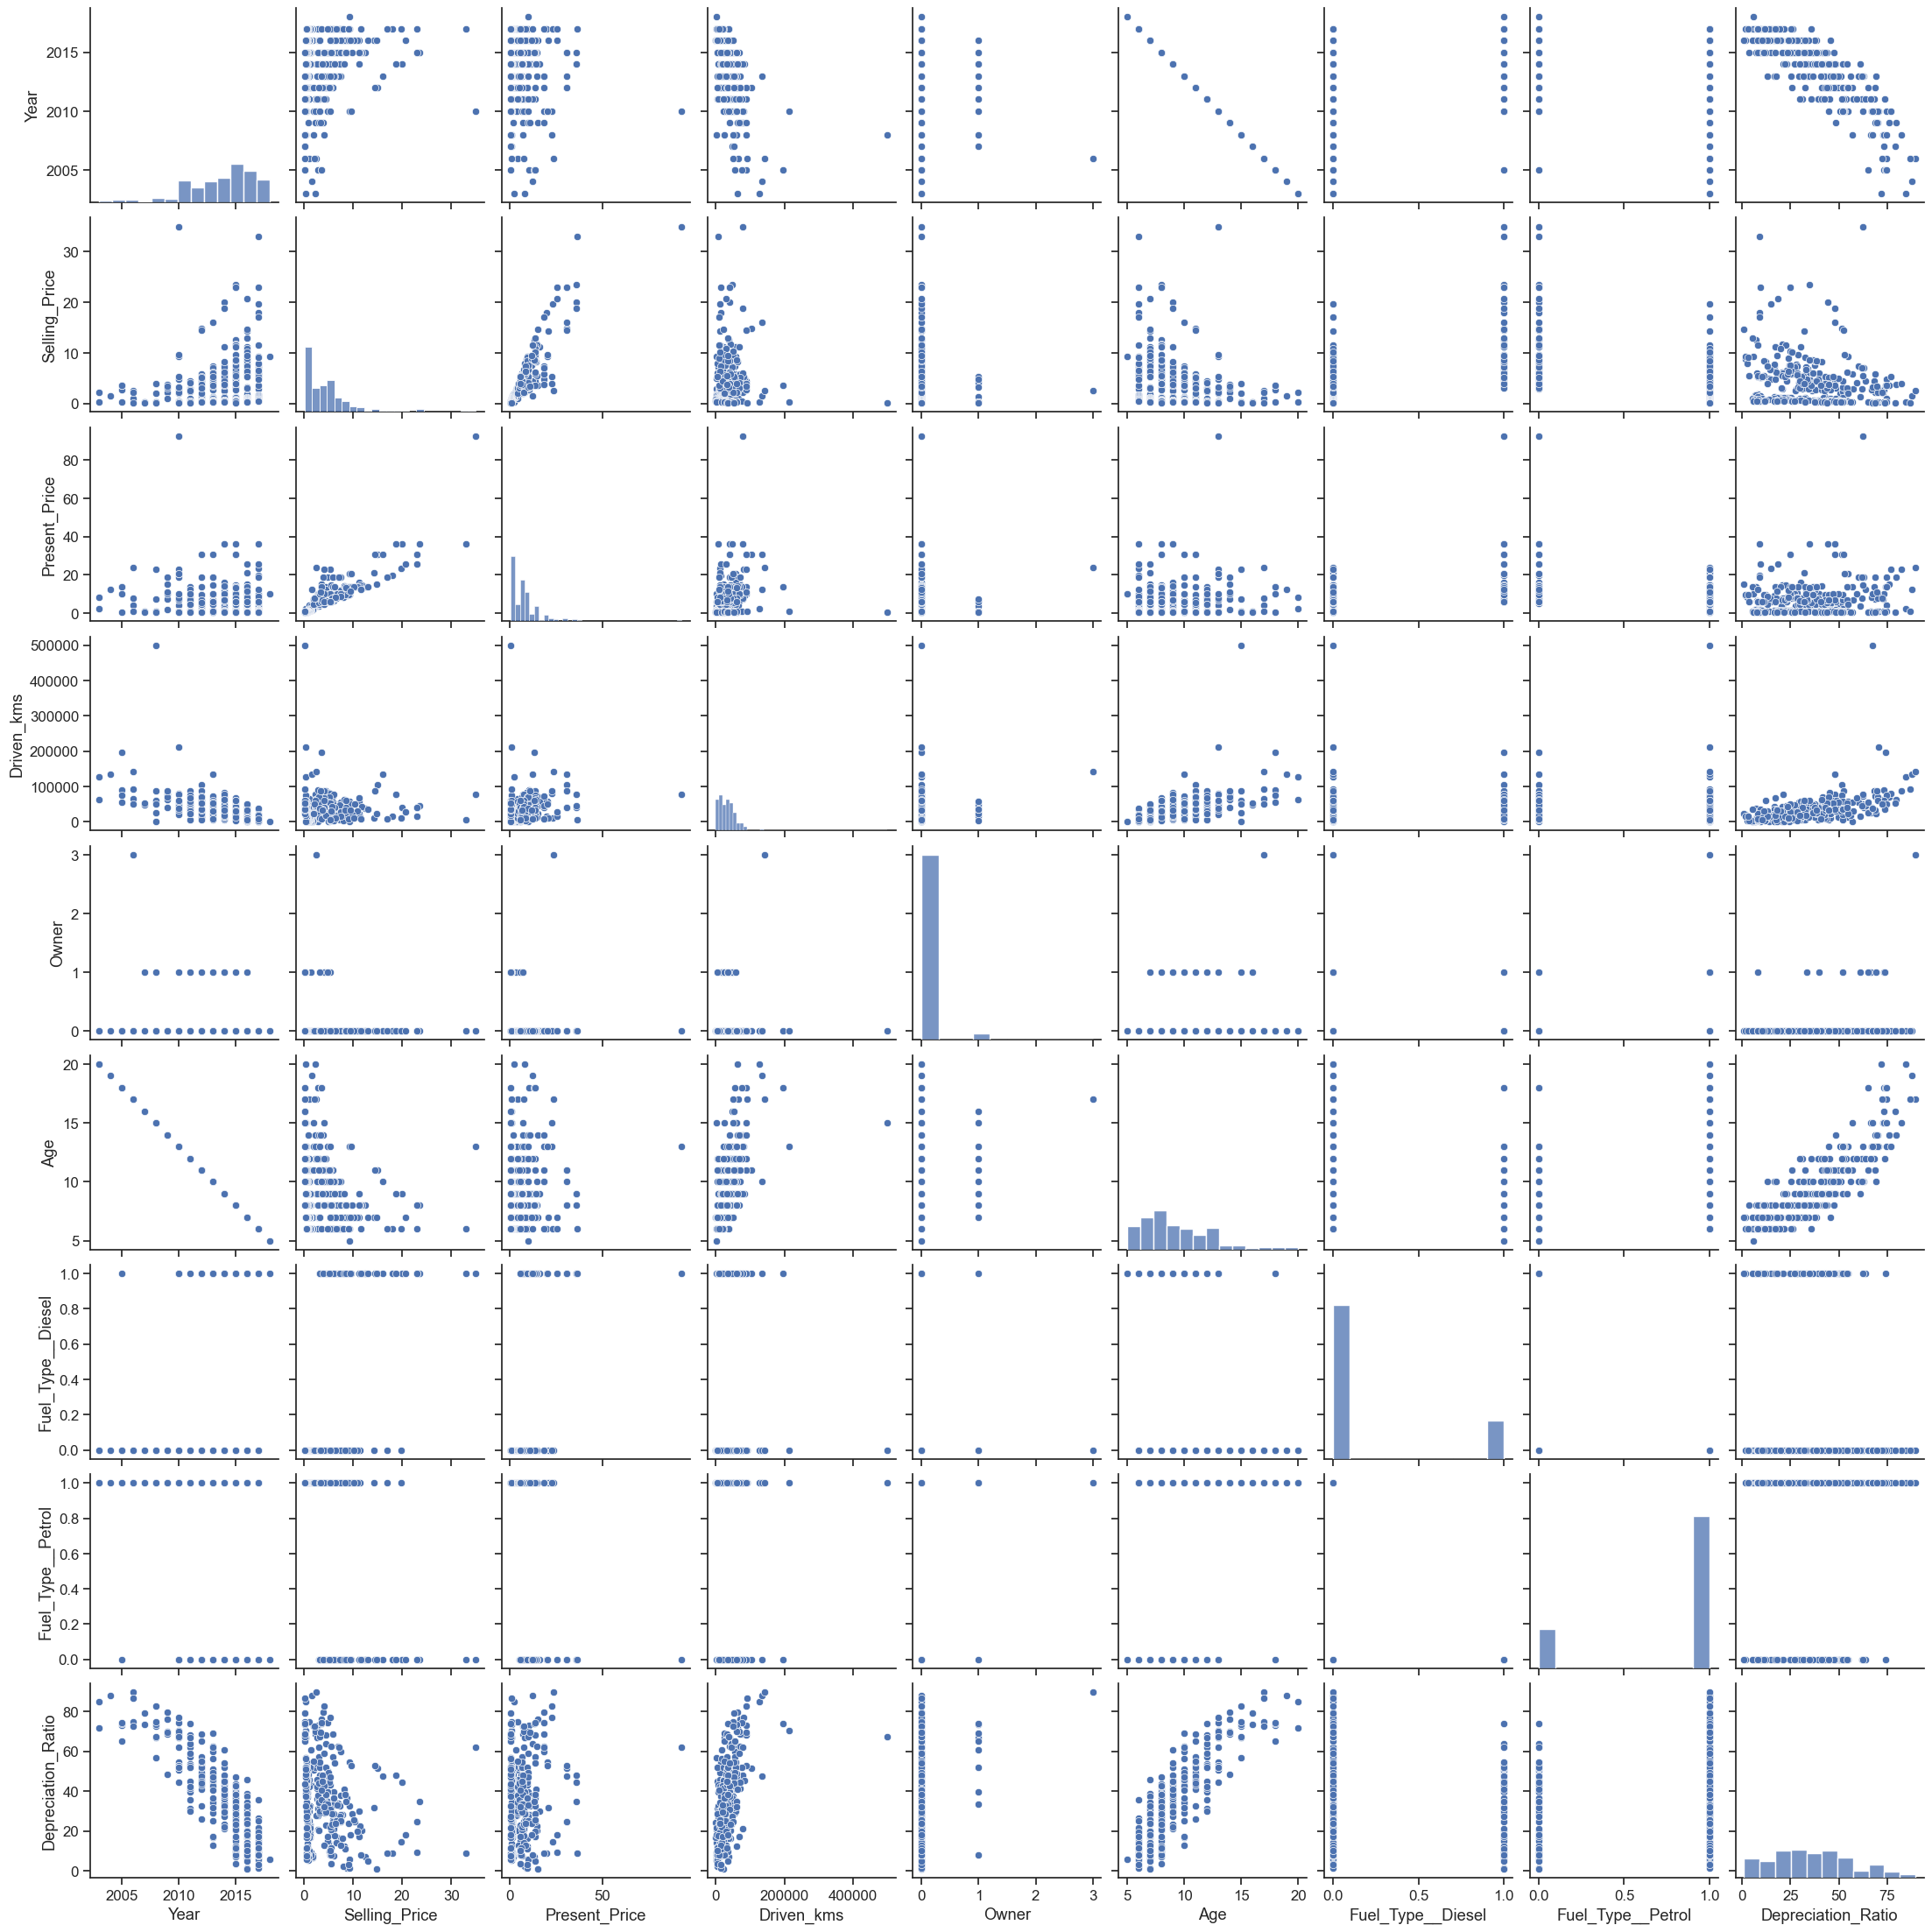

In [131]:
sns.pairplot(df[["Year", "Selling_Price", "Present_Price", "Driven_kms", "Owner", "Age", "Fuel_Type__Diesel", "Fuel_Type__Petrol", "Depreciation_Ratio"]])
plt.show()

### 관찰 결과
+ Year변수와 Age변수는 당연히 높은 상관관계를 보임. 따라서 한 변수는 제거
+ Selling_Price변수와 Present_Price변수가 높은 상관관계를 보임.

### 다중 공산성 판단을 위한 VIF
+ 회귀분석을 먼저 돌렸는데 OLS에 다중 공산성 문제가 의심되서 위에 코드 삽입.
+ 다중공산성을 해결하기 위한 가장 기본적인 방법은 VIF값이 높은 변수들 중에서 종속변수와의 상관성이 가장 낮은 변수를 제거하고 다시 VIF값을 확인하는 것을 반복.

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[["Selling_Price", "Driven_kms", "Owner", "Age", "Fuel_Type__Diesel"]]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.341327,Selling_Price
1,2.559377,Driven_kms
2,1.060893,Owner
3,3.040263,Age
4,1.863702,Fuel_Type__Diesel


### 관찰결과
+ 1회차
    + 5 이상인 수치가 4개나 발견. Selling_Price, Present_Price, Age, Fuel_Type__Petrol
    + 이 중 종속변수와 상관성이 낮은 변수 Present_Price를 제거 후 다시 관찰
+ 2회차
    + 5 이상인 수치 2개 발견. Age와 Fuel_Type__Petrol
    + 이 중 종속변수와 상관성이 낮은 변수 Fuel_Type__Petrol을 제거 후 다시 관찰
    + 여기까지 하니까 다중 공산성이 안정됌. 회귀분석 다시 실행

In [173]:
# 변수 삭제 코드
df = df.drop(labels=["Fuel_Type__Petrol"], axis=1)

KeyError: "['Fuel_Type__Petrol'] not found in axis"

In [192]:
x = df[["Selling_Price", "Driven_kms", "Owner", "Age", "Fuel_Type__Diesel"]]
y = df[["Depreciation_Ratio"]]

# 학습 데이터와 테스트 데이터 7 : 3 비율 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

print(len(x_train))
print(len(x_test))

210
91


In [193]:
# 다중회귀 모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

LinearRegression()

In [194]:
# 테스트 셋에 모델 적용
y_predict = mreg.predict(x_test)

# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

# R-Square 확인
print("학습 데이터 R-Square : {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트 셋 R-Square : {:.2f}".format(mreg.score(x_test, y_test)))

[-16.29100976]
[[ 5.35399338e-02  5.32890252e-05  8.45431788e+00  5.41875544e+00
  -3.47087585e+00]]
학습 데이터 R-Square : 0.71
테스트 셋 R-Square : 0.76


3. 다항회귀

In [197]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

# 다중회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train)

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

In [200]:
print(mreg_poly.intercept_)
print(mreg_poly.coef_)

[-35.81606038]
[[-2.66623152e-01  2.78323698e-04  3.78789398e+01  9.14860133e+00
  -1.83825561e+00  3.85550616e-02  1.37301435e-05 -9.06308356e+00
  -7.67121473e-02 -9.30098664e-01 -4.56229688e-10  2.18705561e-04
  -2.08713052e-06 -1.92155688e-04  3.78789398e+01 -5.01540539e+00
  -6.58418808e-01 -2.05116546e-01  1.26750961e+00 -1.83825561e+00]]


In [201]:
print("학습셋 R-Square : {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square : {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square : 0.79
테스트셋 R-Square : -0.48


### 6. 모델 해석 및 결론
+ 모델 평가는 경험삼아 책을 참고해 추가로 해봤다.


In [205]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

# RMSE 산출
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
print(("RMSE : {:.2f}".format(RMSE)))

# MAE 산출
MAE = mean_absolute_error(y_test, y_predict)
print(("MAE : {:.2f}".format(MAE)))

# MAPE 산출
MAPE = mean_absolute_percentage_error(y_test, y_predict)
print(("MAPE : {:.2f}".format(MAPE)))

# RMSLE 산출(MSLE의 제곱근)
y_predict_df = pd.DataFrame(y_predict, columns=["Depreciation_Ratio"])
y_predict_df2 = y_predict_df.copy()
y_predict_df2.loc[y_predict_df2["Depreciation_Ratio"] < 0, "Depreciation_Ratio"] = 0
y_predict_rmsle = y_predict_df2.to_numpy()

MSLE = mean_squared_log_error(y_test, (y_predict_rmsle))
RMSLE = np.sqrt(MSLE)
print(("RMSLE : {:.2f}".format(RMSLE)))

RMSE : 9.93
MAE : 8.11
MAPE : 0.43
RMSLE : 0.40


### 관찰 결과
+ 학습을 여러번 돌려본 결과 다항 회귀 모델은 과적합이 의심되는 결과가 많이 나왔다. 아마 데이터가 조금 부족한듯하다.
+ 일반 회귀 모델의 학습셋, 테스트셋 R-Square값은 차이가 크지 않았다.
+ 일반 회귀 모델이 다항 회귀 모델보다 예측력이 좋았다. 다항 회귀 모델이 과적합이 나타나는 결과를 많이 보였다.
+ 최종적으로 "Depreciation_Ratio"에 영향을 미치는 독립변수는 "Selling_Price", "Driven_kms", "Owner", "Age", "Fuel_Type__Diesel"이었다.
+ 감가율(Depreciation_Ratio)에 가장 큰 영향을 미치는 요소는 연식(Age)이다.